Heart Disease Prediction using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle

Load Dataset

In [2]:
df = pd.read_csv('/Users/praswishbasnet/Documents/GitHub/Heart-Disease-Prediction-Using-Logistic-Regression/data/HeartDisease_Dataset.csv')

In [3]:
# Map categorical columns to numeric values
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 2, 'Down': 3})

Dataset Overview

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           0   
1   49    0              3        160          180          0           0   
2   37    1              2        130          283          0           1   
3   48    0              3        138          214          0           0   
4   54    1              3        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         2             1  
2     98               0      0.0         1             0  
3    108               1      1.5         2             1  
4    122               0      0.0         1             0  


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1190 non-null   int64  
 1   Sex             1190 non-null   int64  
 2   ChestPainType   1190 non-null   int64  
 3   RestingBP       1190 non-null   int64  
 4   Cholesterol     1190 non-null   int64  
 5   FastingBS       1190 non-null   int64  
 6   RestingECG      1190 non-null   int64  
 7   MaxHR           1190 non-null   int64  
 8   ExerciseAngina  1190 non-null   int64  
 9   Oldpeak         1190 non-null   float64
 10  ST_Slope        1190 non-null   int64  
 11  HeartDisease    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [6]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,2.707563,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.625210,0.528571
std,9.358203,0.424884,0.564012,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.608908,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
print("\nTarget Variable Distribution:")
print(df['HeartDisease'].value_counts())


Target Variable Distribution:
HeartDisease
1    629
0    561
Name: count, dtype: int64


In [8]:
df.corr()['HeartDisease'].sort_values(ascending=True)

MaxHR            -0.413278
Cholesterol      -0.198366
RestingECG        0.073059
RestingBP         0.121415
FastingBS         0.216695
Age               0.262029
ChestPainType     0.307386
Sex               0.311267
Oldpeak           0.398385
ExerciseAngina    0.481467
ST_Slope          0.508200
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

Data Visualization

Correlation Heatmap

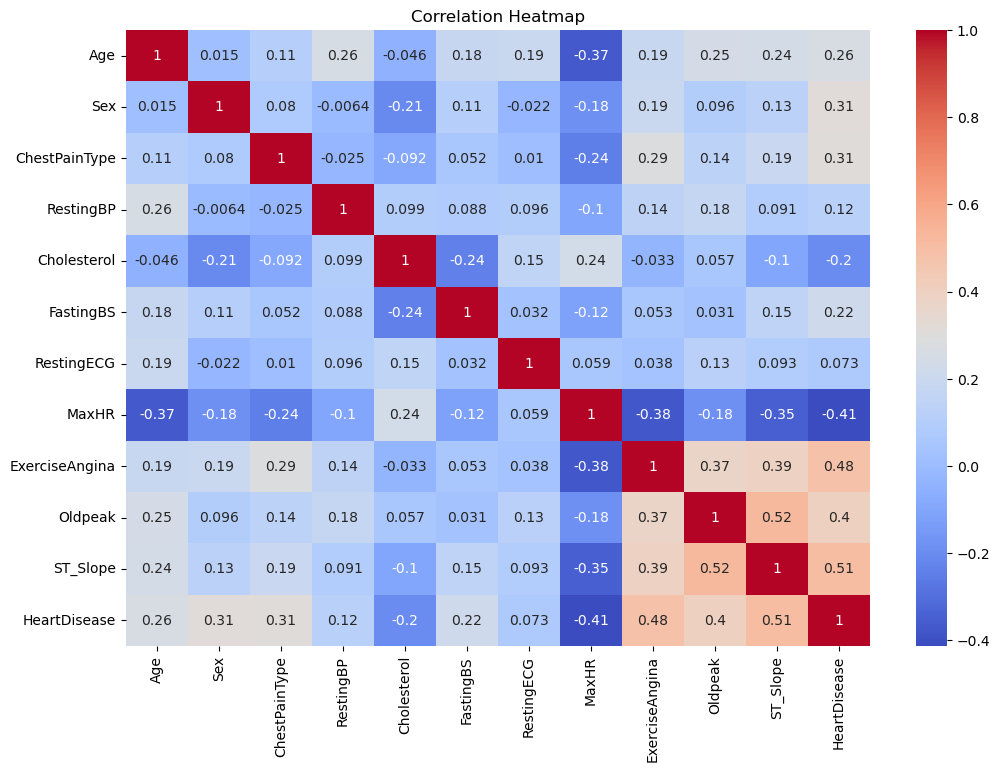

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Distributions

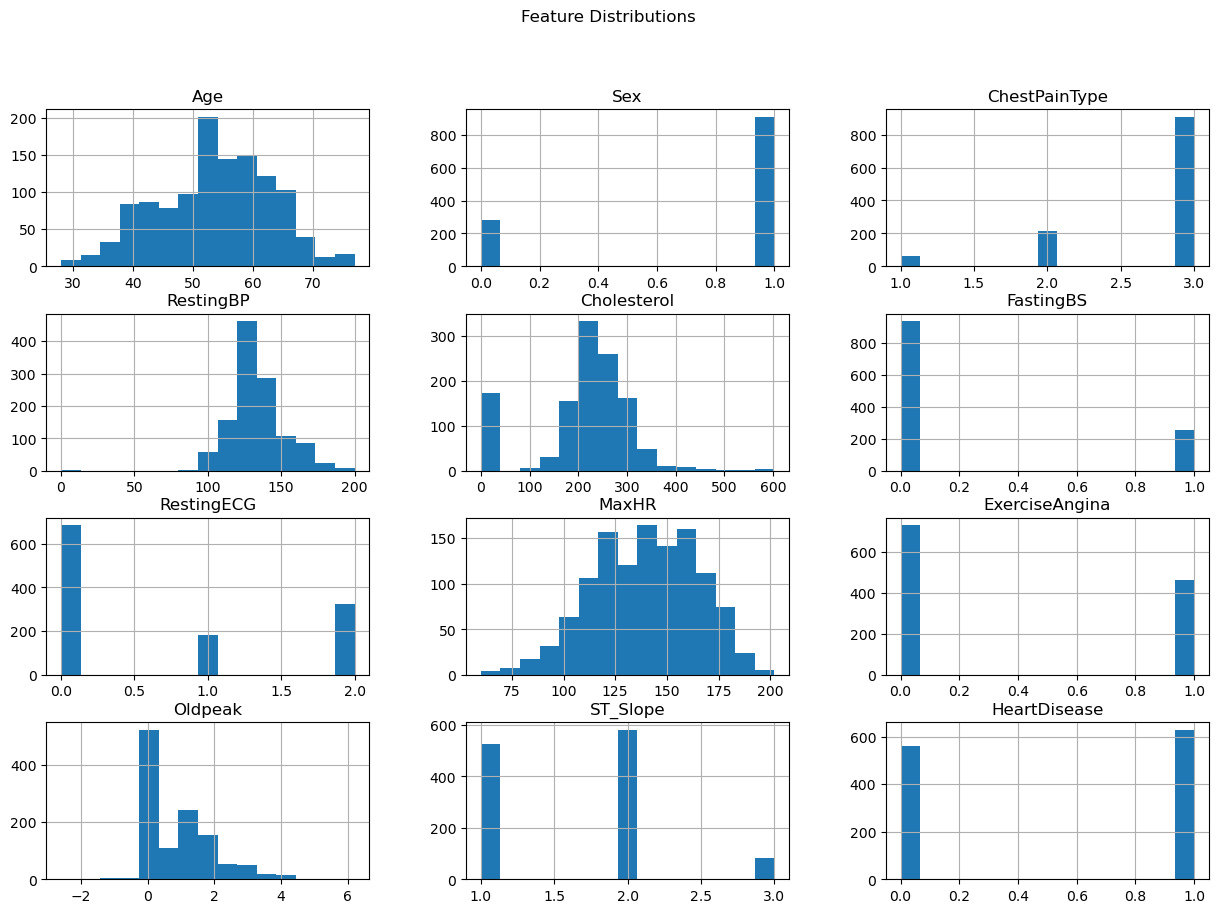

In [10]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

Target Variable Distribution

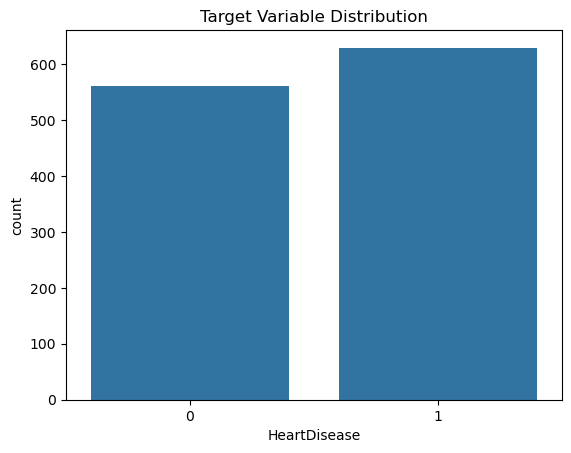

In [11]:
sns.countplot(data=df, x='HeartDisease')
plt.title('Target Variable Distribution')
plt.show()

Data Preprocessing

In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [13]:
# Encoding categorical features (if any)
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Scaling numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
# Save the scaler for later use during prediction
with open('/Users/praswishbasnet/Desktop/Heart-Disease-Prediction-Using-Logistic-Regression/nootbook/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [16]:
# Splitting features and target
X = df.drop(columns='HeartDisease', axis=1)
Y = df['HeartDisease']

Splitting Dataset into Train and Test

In [17]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=23)
print("\nTrain and Test Set Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Train and Test Set Shapes:
X_train: (952, 11) X_test: (238, 11)


Model Training: Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
# Save the model for later use during prediction
with open('/Users/praswishbasnet/Desktop/Heart-Disease-Prediction-Using-Logistic-Regression/nootbook/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [20]:
# Model Evaluation
Y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.88      0.84      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



Accuracy Score

In [21]:
# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.8529411764705882


Confusion Matrix

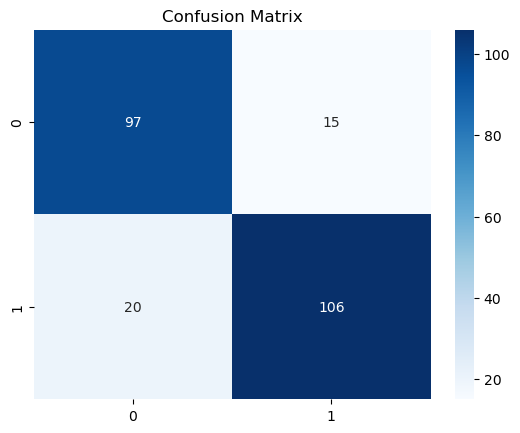

In [22]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ROC Curve

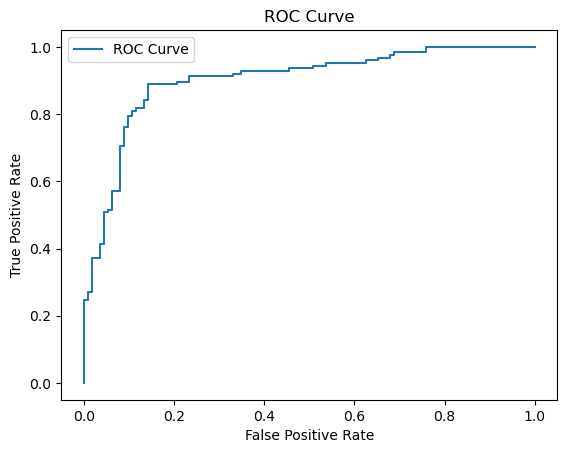

In [23]:
# Generate ROC Curve
Y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Feature Importance

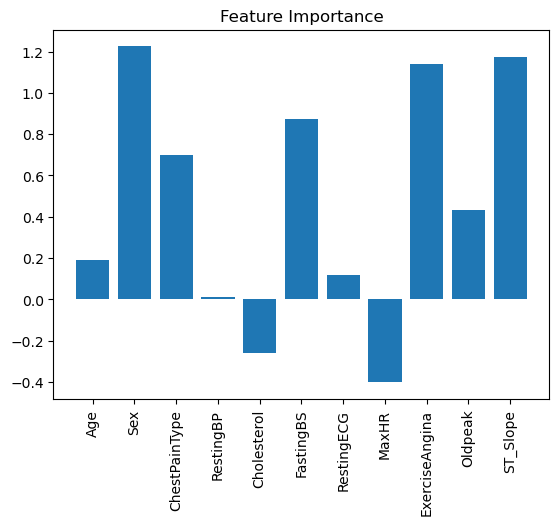

In [24]:
feature_names = X.columns
importance = model.coef_[0]

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

Additional Evaluation Metrics

In [25]:
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)


Precision: 0.8760330578512396
Recall: 0.8412698412698413
F1-Score: 0.8582995951417005
ROC-AUC Score: 0.9012188208616779


Sample Prediction

In [26]:
# Sample Prediction
input_data = (49, 1, 3, 160, 180, 0, 0, 156, 0, 1, 2)  # Example input for the selected features
input_array = np.array(input_data).reshape(1, -1)

# Ensure the input data matches the training features
if len(input_array[0]) != X.shape[1]:
    raise ValueError(f"Input data must have {X.shape[1]} features, but got {len(input_array[0])}.")

# Scale numerical features in the input data
numerical_indices = [i for i, col in enumerate(X.columns) if col in numerical_columns]
numerical_input = input_array[:, numerical_indices]
scaled_numerical_input = scaler.transform(numerical_input)
scaled_input = input_array.copy()
scaled_input[:, numerical_indices] = scaled_numerical_input

# Make the prediction
prediction = model.predict(scaled_input)
print("\nPrediction for Input Data:", "Has Heart Disease" if prediction[0] == 1 else "Does not Have Heart Disease")


Prediction for Input Data: Has Heart Disease


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
